In [3]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [102]:
df_MAS = df[df['job_country'] == 'Malaysia']

df_MAS

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
47,Senior Data Engineer,Senior Data Engineering,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Trabajo.org,Full-time,False,Malaysia,2023-05-06 14:15:59,True,False,Malaysia,None,NaN,NaN,Agensi Pekerjaan BTC Sdn Bhd,"[sql, python, scala, nosql, java, c, spark, ha...","{'analyst_tools': ['power bi', 'microstrategy'..."
328,Data Analyst,Finance Data Analyst,"Sepang, Selangor, Malaysia",via Trabajo.org,Full-time,False,Malaysia,2023-07-14 13:11:55,True,False,Malaysia,None,NaN,NaN,AirAsia,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
396,Data Scientist,Data Scientist,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via BeBee Malaysia,Full-time,False,Malaysia,2023-08-18 13:30:14,False,False,Malaysia,None,NaN,NaN,PublicisGroupe,"[python, r, sql, aws, hadoop, spark, linux]","{'cloud': ['aws'], 'libraries': ['hadoop', 'sp..."
644,Data Engineer,Data Engineer,Malaysia,via BeBee Malaysia,Full-time,False,Malaysia,2023-08-18 13:30:27,False,False,Malaysia,None,NaN,NaN,cultivate,"[python, aws, gcp, azure, hadoop, spark]","{'cloud': ['aws', 'gcp', 'azure'], 'libraries'..."
751,Senior Data Analyst,(Expression of Interest) - Senior Data Analyst...,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via LinkedIn,None,False,Malaysia,2023-01-13 13:23:12,False,False,Malaysia,None,NaN,NaN,foodpanda,"[sql, python, express]","{'programming': ['sql', 'python'], 'webframewo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785543,Data Scientist,Senior Insights Analyst,"Lumut, Perak, Malaysia",via Trabajo.org,Full-time,False,Malaysia,2023-01-31 06:21:20,False,False,Malaysia,None,NaN,NaN,Kognitiv Corporation,"[r, aws, tableau, excel, powerpoint, bitbucket]","{'analyst_tools': ['tableau', 'excel', 'powerp..."
785653,Software Engineer,Tableau Developer,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Trabajo.org,Full-time,False,Malaysia,2023-10-29 06:27:54,False,False,Malaysia,None,NaN,NaN,SVI TECHNOLOGIES SDN BHD,[tableau],{'analyst_tools': ['tableau']}
785662,Business Analyst,Business Analysis and Intelligence Manager,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Trabajo.org,Full-time,False,Malaysia,2023-12-05 06:22:35,False,False,Malaysia,None,NaN,NaN,Denave (M) Sdn Bhd,"[sql, sql server, excel, word, power bi, power...","{'analyst_tools': ['excel', 'word', 'power bi'..."
785677,Cloud Engineer,"Engineer 3, Facilities","Penang, Malaysia",via Smart Recruiters Jobs,Full-time,False,Malaysia,2023-12-21 06:12:22,False,False,Malaysia,None,NaN,NaN,Western Digital,None,None


In [5]:
df_skills = df_MAS.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
47,Senior Data Engineering,sql
47,Senior Data Engineering,python
47,Senior Data Engineering,scala
47,Senior Data Engineering,nosql
47,Senior Data Engineering,java
...,...,...
785662,Business Analysis and Intelligence Manager,powerpoint
785662,Business Analysis and Intelligence Manager,visio
785677,"Engineer 3, Facilities",None
785738,Commercial Analyst - Start Now,powerpoint


In [6]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
977,sql,Data Analyst,1095
272,excel,Data Analyst,1022
763,python,Data Scientist,830
978,sql,Data Engineer,799
761,python,Data Analyst,738
...,...,...,...
1033,t-sql,Cloud Engineer,1
356,gitlab,Business Analyst,1
351,github,Machine Learning Engineer,1
686,perl,Senior Data Scientist,1


In [7]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

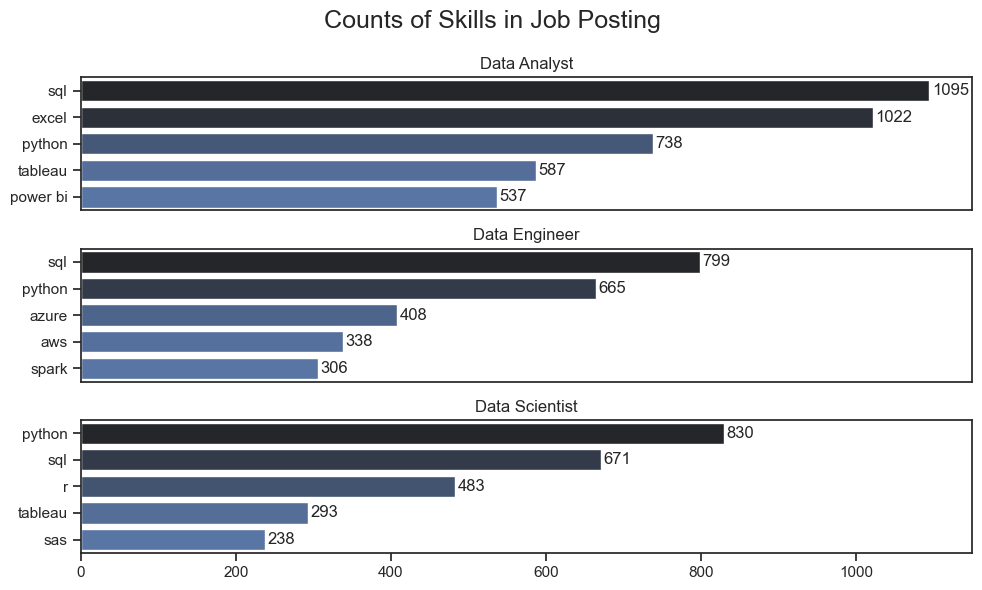

In [101]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10, 6))

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    # df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_count', y='job_skills',
                ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 1150)

    for n, v in enumerate(df_plot['skill_count']):
        ax[i].text(v + 3, n, v, va='center')
    
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Counts of Skills in Job Posting', fontsize=18)
plt.tight_layout()
plt.show()

In [35]:
df_job_count = df_MAS['job_title_short'].value_counts().reset_index(name='job_count')

In [49]:
df_skill_perc = pd.merge(df_skills_count, df_job_count, how='left' )

df_skill_perc['skill_percentage'] = 100 * df_skill_perc['skill_count'] / df_skill_perc['job_count'] 

df_skill_perc

,job_skills,job_title_short,skill_count,job_count,skill_percentage
0,sql,Data Analyst,1095,2527,43.332014
1,excel,Data Analyst,1022,2527,40.443213
2,python,Data Scientist,830,1491,55.667337
3,sql,Data Engineer,799,1404,56.908832
4,python,Data Analyst,738,2527,29.204590
...,...,...,...,...,...
1175,t-sql,Cloud Engineer,1,258,0.387597
1176,gitlab,Business Analyst,1,1320,0.075758
1177,github,Machine Learning Engineer,1,163,0.613497
1178,perl,Senior Data Scientist,1,281,0.355872


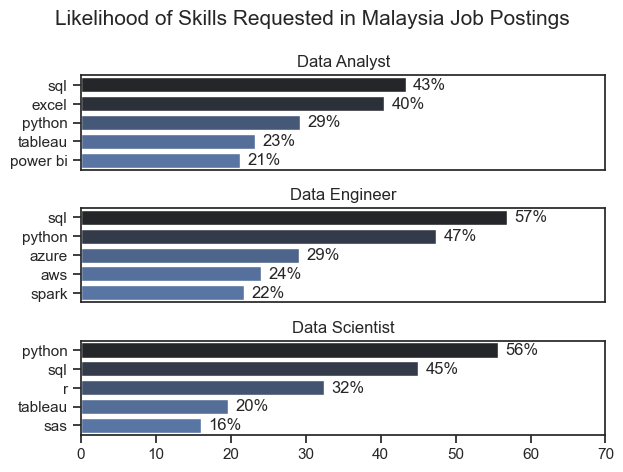

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percentage', y='job_skills',
                ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 70)
    ax[i].legend().set_visible(False)

    for n, v in enumerate(df_plot['skill_percentage']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')
    
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
    
fig.suptitle(
    'Likelihood of Skills Requested in Malaysia Job Postings', fontsize=15)
plt.tight_layout()
plt.show()